In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import itertools
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error



In [2]:
mpg = sns.load_dataset('mpg')

In [3]:
mpg.shape

(398, 9)

In [4]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [6]:
mpg.describe(include = object)

,origin,name
count,398,398
unique,3,305
top,usa,ford pinto
freq,249,6


In [7]:
mpg.head() # Display the first few rows of the dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [8]:
mpg_num = mpg[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year' ]]
mpg_num.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


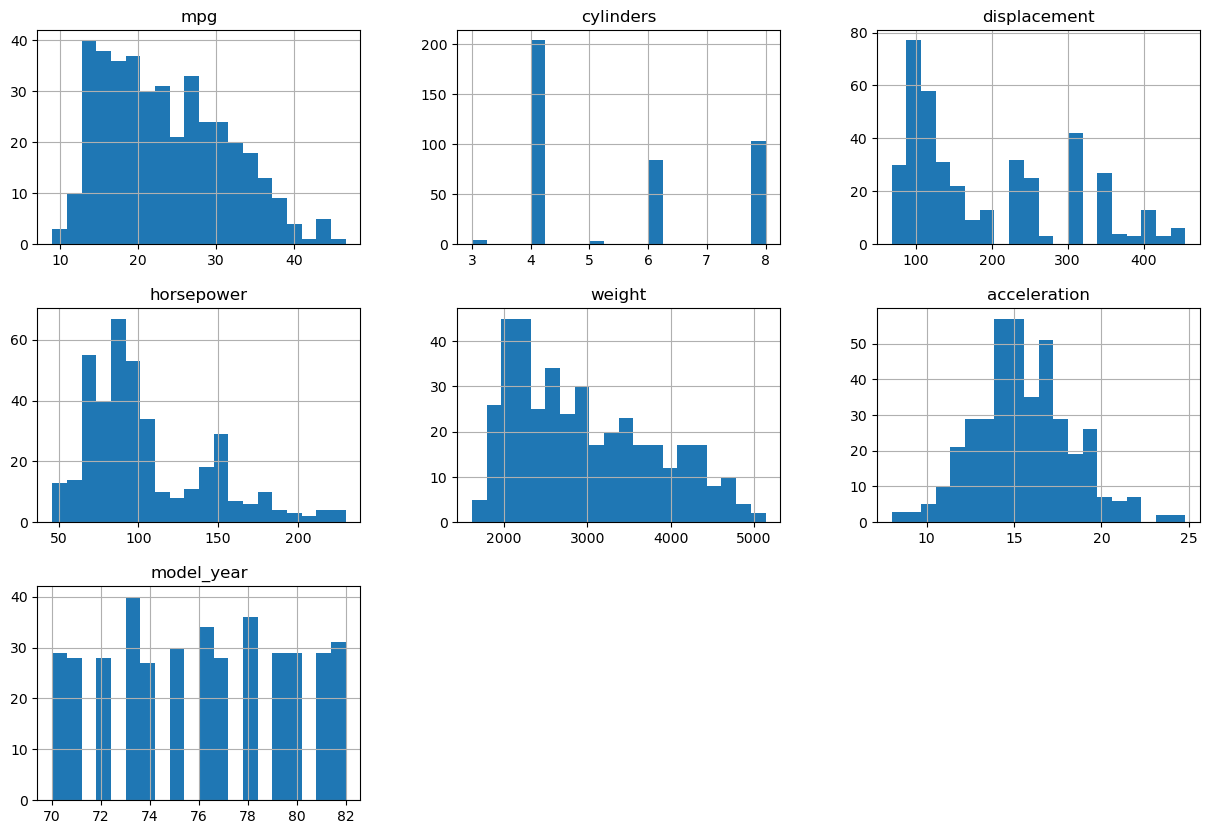

In [9]:
# Histograms for numerical variables
mpg.hist(bins=20, figsize=(15, 10))
plt.show()

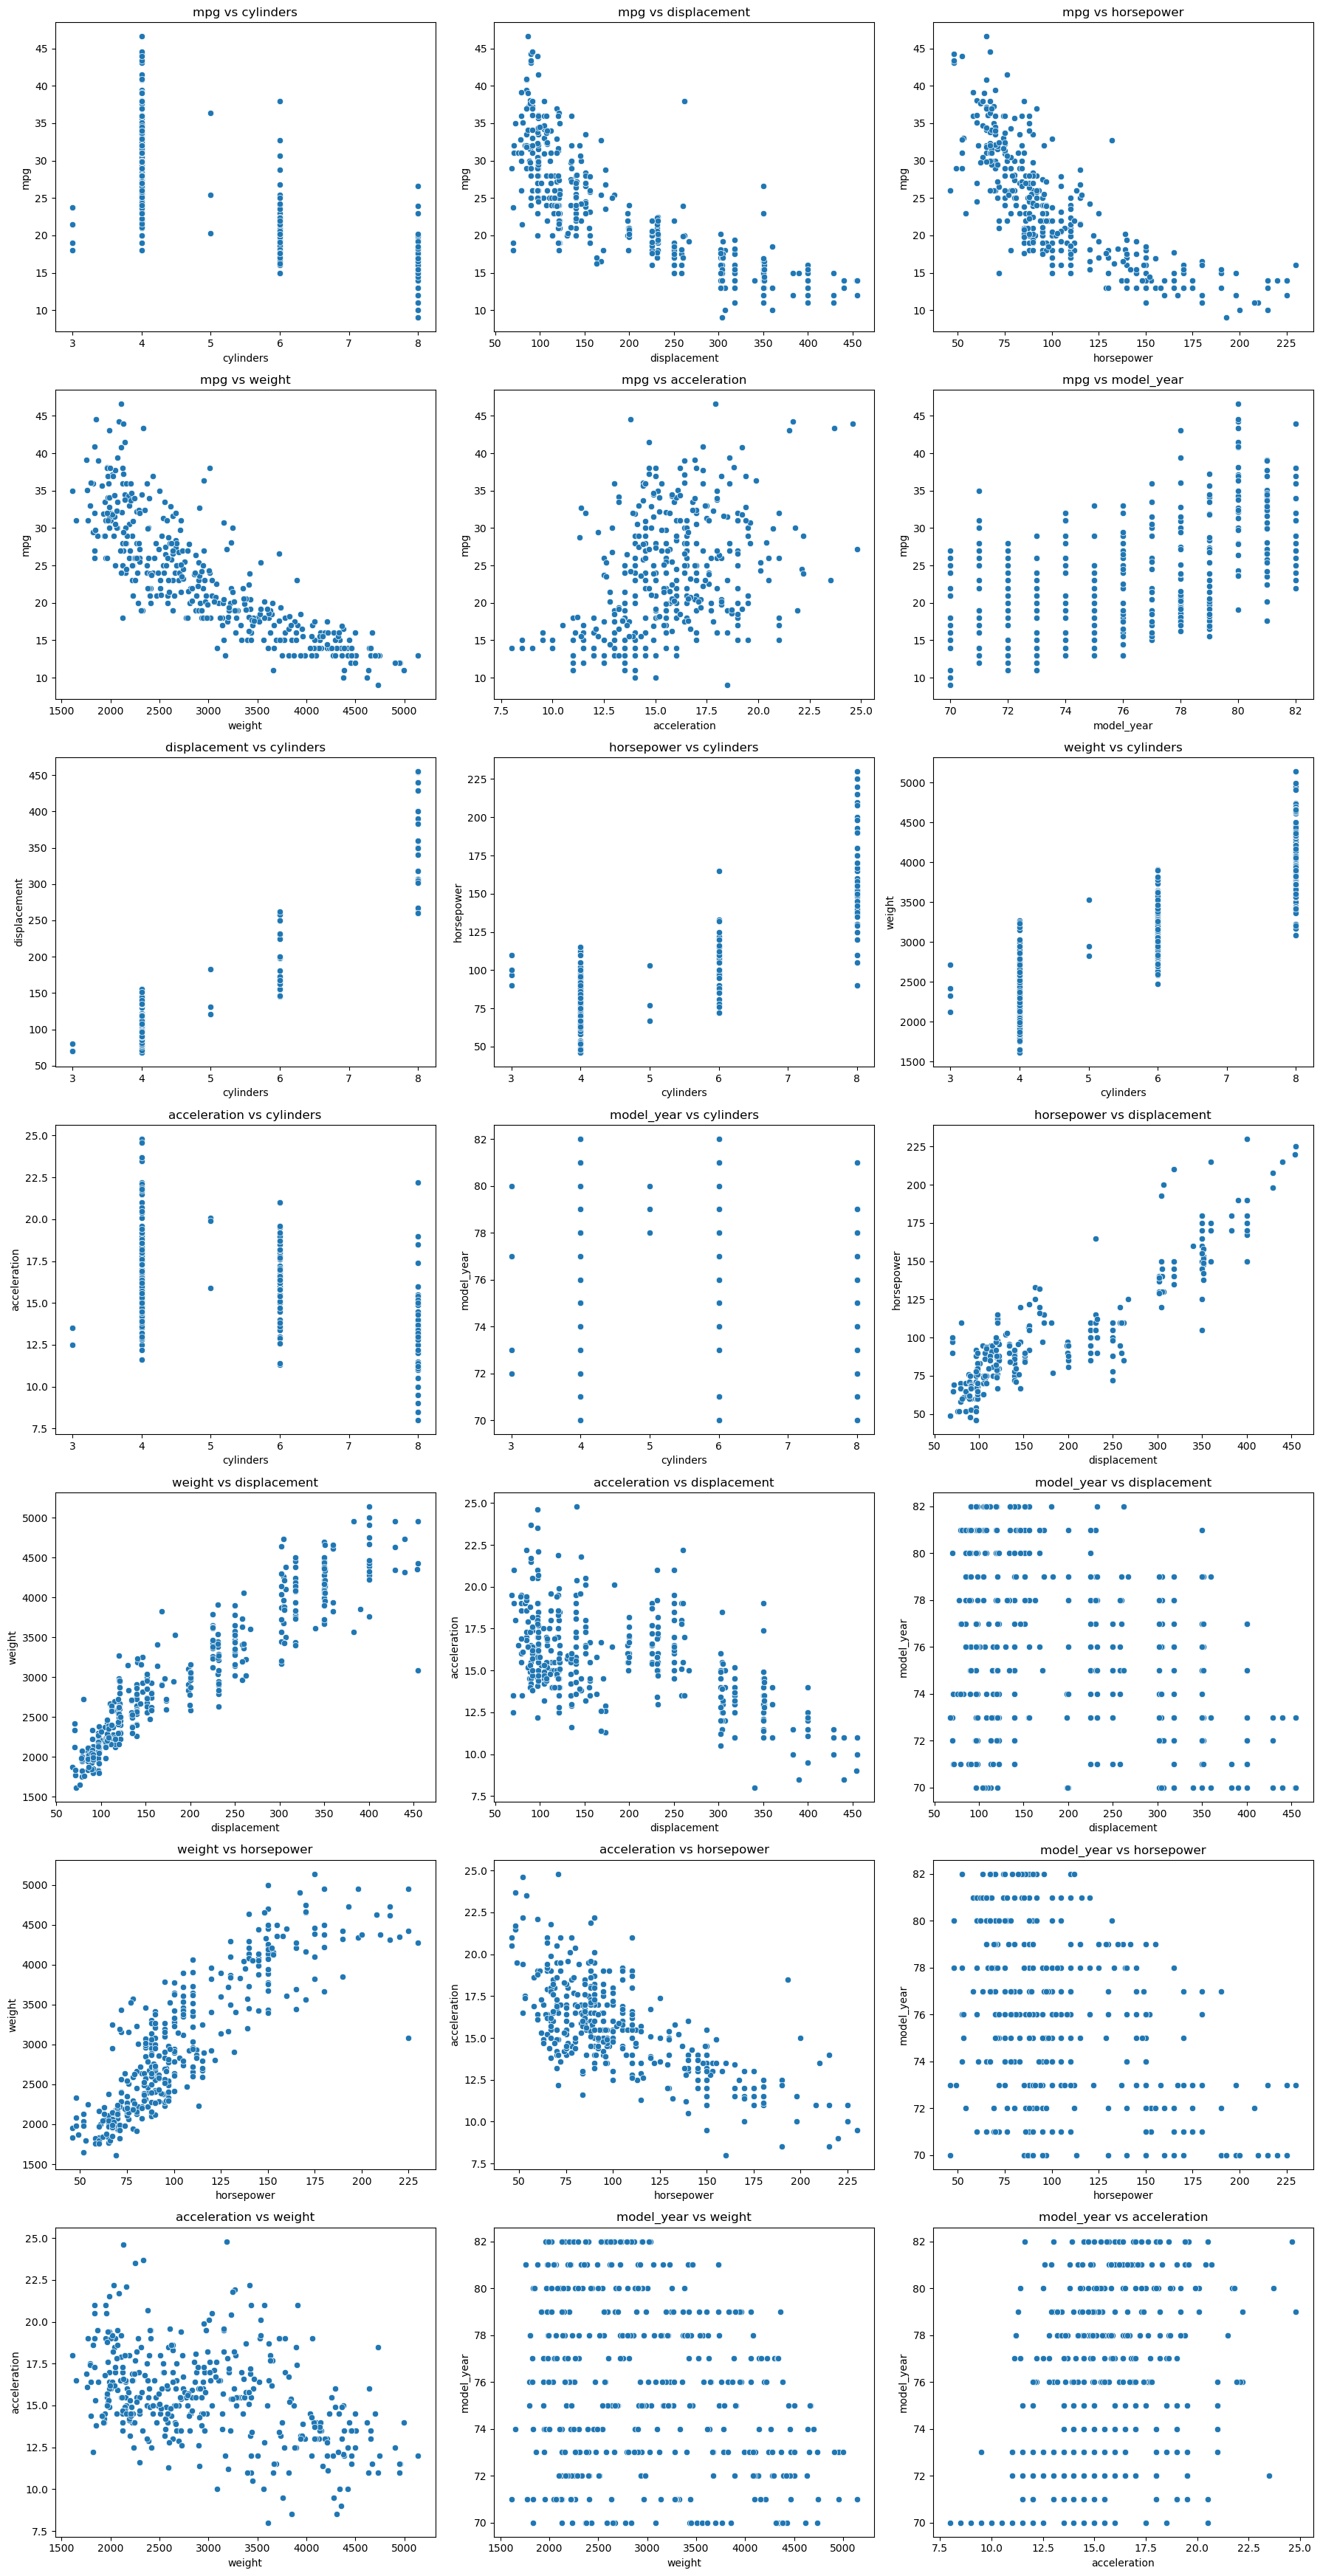

In [10]:
variables = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']

num_vars = len(variables)
num_plots = len(list(itertools.combinations(variables, 2)))

# Determine grid size for subplots
num_rows = (num_plots + 2) // 3  # Roughly aim for a 3-column layout

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(18, num_rows * 5))
axes = axes.flatten()  # Flatten the grid to easily iterate over it

# Generate scatter plots for each pair of variables
for idx, (var1, var2) in enumerate(itertools.combinations(variables, 2)):
    if var1 == 'mpg':
        sns.scatterplot(x=var2, y=var1, data=mpg, ax=axes[idx])
        axes[idx].set_xlabel(var2)
        axes[idx].set_ylabel(var1)
        axes[idx].set_title(f'{var1} vs {var2}')
    elif var2 == 'mpg':
        sns.scatterplot(x=var1, y=var2, data=mpg, ax=axes[idx])
        axes[idx].set_xlabel(var1)
        axes[idx].set_ylabel(var2)
        axes[idx].set_title(f'{var2} vs {var1}')
    else:
        sns.scatterplot(x=var1, y=var2, data=mpg, ax=axes[idx])
        axes[idx].set_xlabel(var1)
        axes[idx].set_ylabel(var2)
        axes[idx].set_title(f'{var2} vs {var1}')

# Adjust layout
plt.tight_layout()
plt.show()

In [11]:
missing_values = mpg.isnull().sum()
missing_values

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [12]:
mpg[mpg.isnull().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [13]:
# Convert from categorical data to numerical data

X = mpg.drop(columns=['mpg', 'name'])  # Dropping 'name' column as it is non-numeric
y = mpg['mpg']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=231)


In [14]:
numerical_cols = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']
imputer = SimpleImputer(strategy='mean')

X_train[numerical_cols] = imputer.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = imputer.transform(X_test[numerical_cols])

# Check again for any missing values
print("Missing values after imputation:")
print(X_train.isnull().sum())

Missing values after imputation:
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In [15]:



categorical_cols = ['origin']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='error')
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])



In [16]:


# Convert encoded columns to DataFrame
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_test.index)

X_train_numeric = X_train[numerical_cols]
X_test_numeric = X_test[numerical_cols]

# Concatenate the encoded categorical columns back to the training and test sets
X_train_final = pd.concat([X_train_numeric, X_train_encoded], axis=1)
X_test_final = pd.concat([X_test_numeric, X_test_encoded], axis=1)



In [17]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled  = scaler.transform(X_test_final)

In [18]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on training and test sets
y_train_pred =model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)


# Evaluate the model
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)


# Report coefficients with proper spacing
print("Coefficients:")
for feature, coef in zip(X_train_final.columns, model.coef_):
    print(f"{feature:<15}: {coef}")
print("\n")

# Report training and test performance with proper spacing
metrics = {
    "Training R-squared": train_r2,
    "Training MSE": train_mse,
    "Test R-squared": test_r2,
    "Test MSE": test_mse
}

# Find the longest key for alignment purposes
max_len = max(len(key) for key in metrics.keys())

# Print metrics with proper spacing
for key, value in metrics.items():
    print(f"{key:<{max_len}}: {value}")

Coefficients:
cylinders      : -3.072836268639777
displacement   : 10.869748953454174
horsepower     : -2.4049507930460234
weight         : -25.498848990341074
acceleration   : 2.0232128270447314
model_year     : 8.882519840545076
origin_europe  : 0.7457218778875097
origin_japan   : 1.1142010933778534
origin_usa     : -1.8599229712653205


Training R-squared: 0.8193391903369874
Training MSE      : 10.781501110591266
Test R-squared    : 0.8339234339104407
Test MSE          : 10.632428318782665
